# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [4]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [5]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [6]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [7]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [8]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [9]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

### Verificando a inicialização dos parâmetros

In [10]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

<ipython-input-10-4472ed23bcd1>:2: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0480, -0.0267]], requires_grad=True)

### Testando o predict da rede

In [11]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [12]:
model(Variable(xx))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

In [13]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/100], loss: 0.022983
Epoch[40/100], loss: 0.021432
Epoch[60/100], loss: 0.021207
Epoch[80/100], loss: 0.021175
Epoch[100/100], loss: 0.021170


## Avaliação

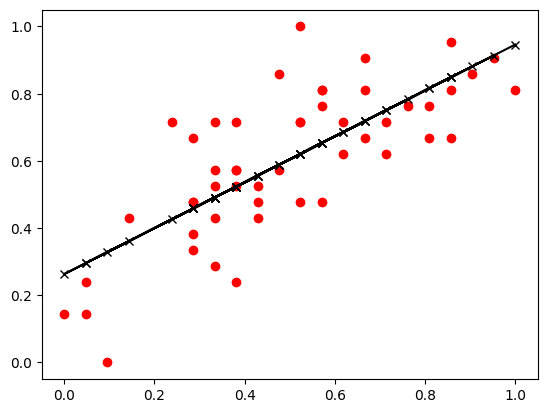

In [14]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [15]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2631, 0.6830]]))])

### Parâmetros ótimos, solução analítica

In [16]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando `loss.data`? Por que precisa do `data`?

*   No PyTorch, o uso de `loss.data` era necessário em versões anteriores para acessar o valor escalar armazenado no tensor da perda, que é um objeto do tipo `Variable`. Ao usar `.data`, você acessava diretamente o tensor subjacente sem gradientes associados. No entanto, com as versões mais recentes do PyTorch, a maneira recomendada de acessar o valor do tensor é utilizando `.item()`, que retorna o valor como um escalar Python.   

In [17]:
print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.item()))

Epoch[100/100], loss: 0.021170


*   Usar .item() é mais seguro e limpo, pois evita o uso direto do .data, que pode levar a erros difíceis de depurar.

2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já treinados.

In [18]:
# Predição com os pesos treinados
y_pred = model(Variable(x_train_bias))

# Cálculo da perda (MSE)
mse_loss = torch.mean((y_pred - y_train)**2)
print("Perda (MSE) com pesos treinados:", mse_loss.item())

Perda (MSE) com pesos treinados: 0.02117014490067959


3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

In [27]:
# Inicialização usando torch.nn.Linear
model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

model.weight.data = torch.zeros(1, 2)
torch.nn.init.uniform_(model.weight.data, -0.1, 0.1)

w0_list = []
w1_list = []

In [32]:
# Treinamento
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    y_pred = model(x_train_bias)
    loss = torch.mean((y_pred - y_train)**2)
    loss.backward()

    # Armazenar os valores dos pesos
    w0_list.append(model.weight.data[0, 0].item())
    w1_list.append(model.weight.data[0, 1].item())

    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data # gradiente descendente
    model.weight.grad.data.zero_() # zeragem parâmetros próximo cálculo do gradiente

    if (epoch + 1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch + 1, num_epochs, loss.item()))


Epoch[20/100], loss: 0.021170
Epoch[40/100], loss: 0.021169
Epoch[60/100], loss: 0.021169
Epoch[80/100], loss: 0.021169
Epoch[100/100], loss: 0.021169


In [33]:
# Solução ótima analítica
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
w_opt = w_opt.t()
print("Solução ótima analítica:", w_opt)

Solução ótima analítica: tensor([[0.2613, 0.6865]])


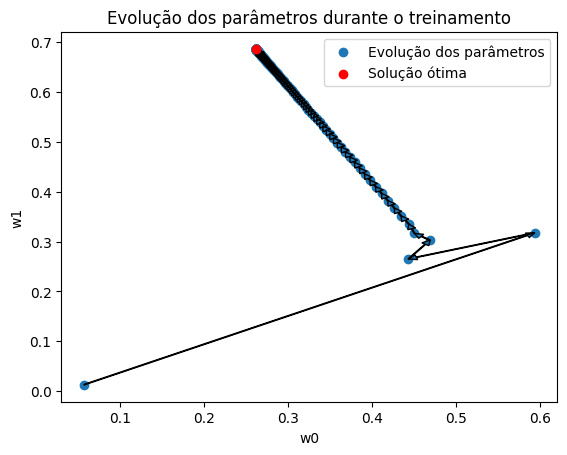

In [34]:
# Plotting a evolução dos parametros
plt.scatter(w0_list, w1_list, label='Evolução dos parâmetros')
w0_old = None
for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None:
        plt.arrow(w0_old, w1_old, w0 - w0_old, w1 - w1_old,
                  head_length=0.01, head_width=0.01, shape='full',
                  length_includes_head=True)
    w0_old, w1_old = w0, w1

plt.scatter(w_opt[0, 0].item(), w_opt[0, 1].item(), color='red', label='Solução ótima')
plt.xlabel('w0')
plt.ylabel('w1')
plt.legend()
plt.title('Evolução dos parâmetros durante o treinamento')
plt.show()

## Ploting vectors

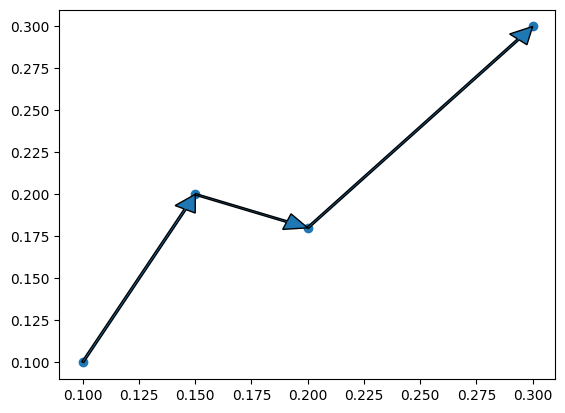

In [35]:
# Exemplo
w0_list = [0.1, 0.15, 0.2, 0.3]
w1_list = [0.1, 0.2, 0.18, 0.3]
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

# Aprendizados

#### 1. Regressão Linear com PyTorch

- **Uso de Tensores do PyTorch**:
  - Substituímos operações NumPy por operações equivalentes usando tensores do PyTorch, permitindo aproveitar a diferenciação automática e outras funcionalidades avançadas.

- **Normalização dos Dados**:
  - Normalizamos as entradas e saídas para garantir que os dados estejam em uma escala comparável, o que pode melhorar a eficiência do treinamento.

#### 2. Treinamento de Modelos com PyTorch

- **Criação e Inicialização de Modelos**:
  - Utilizamos `torch.nn.Linear` para criar um modelo de regressão linear e inicializamos os parâmetros de maneira adequada.

- **Forward Pass e Predição**:
  - Implementamos a função `forward` para calcular as previsões do modelo a partir das entradas.

- **Função de Perda**:
  - Calculamos a função de perda (Mean Squared Error) usando operações de tensores.

- **Backpropagation**:
  - Utilizamos `loss.backward()` para calcular os gradientes automaticamente com base no grafo computacional dinâmico construído durante o forward pass.

- **Gradiente Descendente**:
  - Atualizamos os parâmetros do modelo usando gradiente descendente e zeramos os gradientes após cada iteração para evitar a acumulação.

#### 3. Visualização da Evolução dos Parâmetros

- **Armazenamento da Evolução dos Pesos**:
  - Criamos listas para armazenar a evolução dos valores dos pesos `w0` e `w1` durante o treinamento.

- **Visualização da Trajetória dos Pesos**:
  - Utilizamos um scatter plot para visualizar como os parâmetros do modelo evoluem ao longo das iterações de treinamento.

- **Comparação com Solução Ótima**:
  - Calculamos a solução ótima analítica e a marcamos no gráfico para comparar com a trajetória dos parâmetros durante o treinamento.

